In [10]:
# importing libraries
import requests
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#importing hogwarts data from api
r = requests.get("https://hp-api.onrender.com/api/characters")
hogwarts_df = pd.read_json("https://hp-api.onrender.com/api/characters")
hogwarts_df.head()


,id,name,alternate_names,species,gender,house,dateOfBirth,yearOfBirth,wizard,ancestry,eyeColour,hairColour,wand,patronus,hogwartsStudent,hogwartsStaff,actor,alternate_actors,alive,image
0,9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8,Harry Potter,[],human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,[],True,https://ik.imagekit.io/hpapi/harry.jpg
1,4c7e6819-a91a-45b2-a454-f931e4a7cce3,Hermione Granger,[],human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,[],True,https://ik.imagekit.io/hpapi/hermione.jpeg
2,c3b1f9a5-b87b-48bf-b00d-95b093ea6390,Ron Weasley,[Dragomir Despard],human,male,Gryffindor,01-03-1980,1980.0,True,pure-blood,blue,red,"{'wood': 'willow', 'core': 'unicorn tail-hair'...",Jack Russell terrier,True,False,Rupert Grint,[],True,https://ik.imagekit.io/hpapi/ron.jpg
3,af95bd8a-dfae-45bb-bc69-533860d34129,Draco Malfoy,[],human,male,Slytherin,05-06-1980,1980.0,True,pure-blood,grey,blonde,"{'wood': 'hawthorn', 'core': 'unicorn tail-hai...",,True,False,Tom Felton,[],True,https://ik.imagekit.io/hpapi/draco.jpg
4,ca3827f0-375a-4891-aaa5-f5e8a5bad225,Minerva McGonagall,[],human,female,Gryffindor,04-10-1925,1925.0,True,half-blood,,black,"{'wood': 'fir', 'core': 'dragon heartstring', ...",tabby cat,False,True,Dame Maggie Smith,[],True,https://ik.imagekit.io/hpapi/mcgonagall.jpg


In [12]:
hogwarts_df.describe()

,yearOfBirth
count,21.000000
mean,1954.714286
std,28.616678
min,1881.000000
25%,1950.000000
50%,1960.000000
75%,1980.000000
max,1981.000000


In [13]:
#viewing dimensionality of the DataFrame
print(hogwarts_df.shape)
hogwarts_df.head()

(402, 20)


,id,name,alternate_names,species,gender,house,dateOfBirth,yearOfBirth,wizard,ancestry,eyeColour,hairColour,wand,patronus,hogwartsStudent,hogwartsStaff,actor,alternate_actors,alive,image
0,9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8,Harry Potter,[],human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,[],True,https://ik.imagekit.io/hpapi/harry.jpg
1,4c7e6819-a91a-45b2-a454-f931e4a7cce3,Hermione Granger,[],human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,[],True,https://ik.imagekit.io/hpapi/hermione.jpeg
2,c3b1f9a5-b87b-48bf-b00d-95b093ea6390,Ron Weasley,[Dragomir Despard],human,male,Gryffindor,01-03-1980,1980.0,True,pure-blood,blue,red,"{'wood': 'willow', 'core': 'unicorn tail-hair'...",Jack Russell terrier,True,False,Rupert Grint,[],True,https://ik.imagekit.io/hpapi/ron.jpg
3,af95bd8a-dfae-45bb-bc69-533860d34129,Draco Malfoy,[],human,male,Slytherin,05-06-1980,1980.0,True,pure-blood,grey,blonde,"{'wood': 'hawthorn', 'core': 'unicorn tail-hai...",,True,False,Tom Felton,[],True,https://ik.imagekit.io/hpapi/draco.jpg
4,ca3827f0-375a-4891-aaa5-f5e8a5bad225,Minerva McGonagall,[],human,female,Gryffindor,04-10-1925,1925.0,True,half-blood,,black,"{'wood': 'fir', 'core': 'dragon heartstring', ...",tabby cat,False,True,Dame Maggie Smith,[],True,https://ik.imagekit.io/hpapi/mcgonagall.jpg


In [14]:
fixed_columns = {
    'dateOfBirth':'date_of_birth',
    'yearOfBirth':'year_of_birth',
    'eyeColour':'eye_color',
    'hairColour':'hair_color',
    'hogwartsStudent':'hogwarts_student',
    'hogwartsStaff':'hogwarts_staff'
}

hogwarts_df.rename(columns=fixed_columns,inplace=True)
hogwarts_df.columns

Index(['id', 'name', 'alternate_names', 'species', 'gender', 'house',
       'date_of_birth', 'year_of_birth', 'wizard', 'ancestry', 'eye_color',
       'hair_color', 'wand', 'patronus', 'hogwarts_student', 'hogwarts_staff',
       'actor', 'alternate_actors', 'alive', 'image'],
      dtype='object')

In [15]:
legacy_df = pd.read_excel("hogwartsleg.xlsx")
legacy_df.head()

,name,species,gender,house,NaN,year_of_birth,wizard,ancestry,eye_color,hair_color,patronus,hogwarts_student,hogwarts_staff
0,Amit Thakkar,human,male,Ravenclaw,NaN,1874.0,True,NaN,brown,brown,NaN,True,False
1,Everett Clopton,human,male,Ravenclaw,NaN,1874.0,True,half-blood,brown,brown,NaN,True,False
2,Lucan Brattleby,human,male,Gryffindor,NaN,1875.0,True,NaN,brown,brown,NaN,True,False
3,Mahendra Pehlwaan,human,male,Ravenclaw,NaN,NaN,True,muggleborn,brown,brown,NaN,True,False
4,Natsai Onai,human,female,Gryffindor,NaN,1874.0,True,NaN,brown,black,NaN,True,False


In [16]:
#combined data frame
df = pd.concat([hogwarts_df, legacy_df], axis=0)
print(df.shape)
df.head()

(433, 21)


,id,name,alternate_names,species,gender,house,date_of_birth,year_of_birth,wizard,ancestry,...,hair_color,wand,patronus,hogwarts_student,hogwarts_staff,actor,alternate_actors,alive,image,NaN
0,9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8,Harry Potter,[],human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,...,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False,Daniel Radcliffe,[],True,https://ik.imagekit.io/hpapi/harry.jpg,NaN
1,4c7e6819-a91a-45b2-a454-f931e4a7cce3,Hermione Granger,[],human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,...,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False,Emma Watson,[],True,https://ik.imagekit.io/hpapi/hermione.jpeg,NaN
2,c3b1f9a5-b87b-48bf-b00d-95b093ea6390,Ron Weasley,[Dragomir Despard],human,male,Gryffindor,01-03-1980,1980.0,True,pure-blood,...,red,"{'wood': 'willow', 'core': 'unicorn tail-hair'...",Jack Russell terrier,True,False,Rupert Grint,[],True,https://ik.imagekit.io/hpapi/ron.jpg,NaN
3,af95bd8a-dfae-45bb-bc69-533860d34129,Draco Malfoy,[],human,male,Slytherin,05-06-1980,1980.0,True,pure-blood,...,blonde,"{'wood': 'hawthorn', 'core': 'unicorn tail-hai...",,True,False,Tom Felton,[],True,https://ik.imagekit.io/hpapi/draco.jpg,NaN
4,ca3827f0-375a-4891-aaa5-f5e8a5bad225,Minerva McGonagall,[],human,female,Gryffindor,04-10-1925,1925.0,True,half-blood,...,black,"{'wood': 'fir', 'core': 'dragon heartstring', ...",tabby cat,False,True,Dame Maggie Smith,[],True,https://ik.imagekit.io/hpapi/mcgonagall.jpg,NaN


In [17]:
df.drop(df.columns[[0, 2, 16, 17, 18, 19, 20]], axis=1, inplace=True)
print(df.shape)
df.head(2)



(433, 14)


,name,species,gender,house,date_of_birth,year_of_birth,wizard,ancestry,eye_color,hair_color,wand,patronus,hogwarts_student,hogwarts_staff
0,Harry Potter,human,male,Gryffindor,31-07-1980,1980.0,True,half-blood,green,black,"{'wood': 'holly', 'core': 'phoenix feather', '...",stag,True,False
1,Hermione Granger,human,female,Gryffindor,19-09-1979,1979.0,True,muggleborn,brown,brown,"{'wood': 'vine', 'core': 'dragon heartstring',...",otter,True,False


<AxesSubplot: xlabel='gender', ylabel='count'>

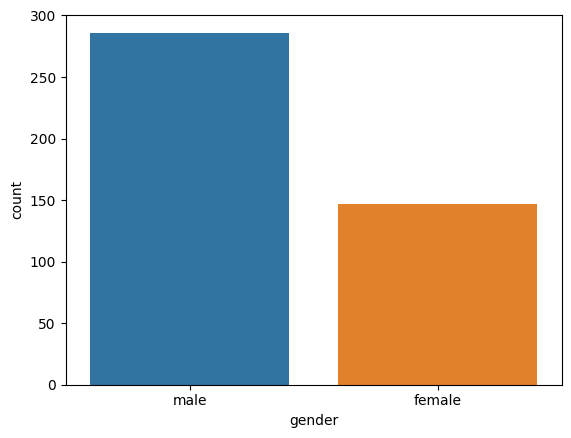

In [38]:

df = pd.read_csv('hogwarts.csv')
sns.countplot(x=df ["gender"])


<AxesSubplot: xlabel='house', ylabel='count'>

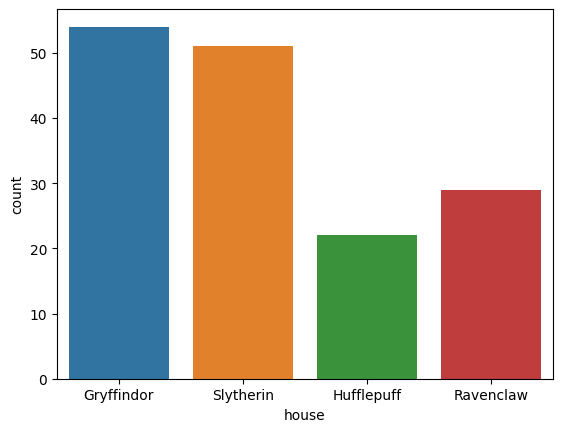

In [39]:
df = pd.read_csv('hogwarts.csv')
sns.countplot(x=df ["house"])

<AxesSubplot: xlabel='wizard', ylabel='count'>

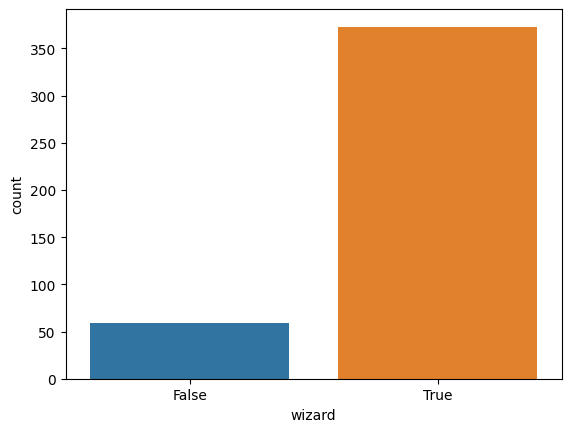

In [42]:
df = pd.read_csv('hogwarts.csv')
sns.countplot(x=df ["wizard"])

<AxesSubplot: xlabel='eye_color', ylabel='count'>

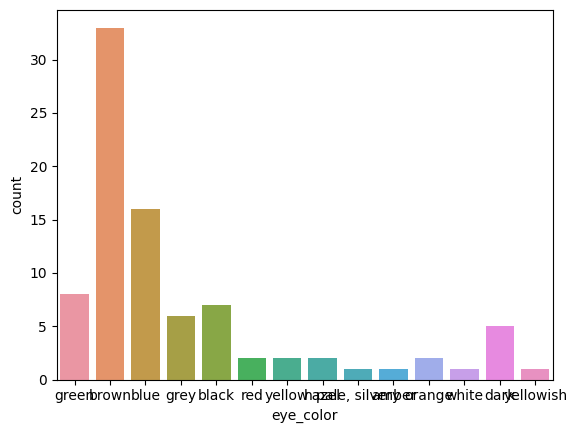

In [43]:
df = pd.read_csv('hogwarts.csv')
newdf = df.dropna()
sns.countplot(x=df ["eye_color"])